In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [17]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#Check for missing values
df.info()
#Check for duplicated rows
df.duplicated().sum()

#In this case no duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


0

In [19]:
#Check for exited guys
df['Exited'].value_counts()
#Check for geography
df['Geography'].value_counts()
#Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
#Remove un-necessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
#Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [24]:
#Train-Test splitting
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [25]:
#Pre-processing
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [26]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [48]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers

#Two types: Sequential and Non

#Here sequential
model=keras.Sequential([
    layers.Dense(11,activation='relu',input_dim=11),
    layers.Dense(11,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
#Optimizer used
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['binary_accuracy']
)

In [53]:
#Train the ANN
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.5277 - loss: 0.7298 - val_binary_accuracy: 0.7944 - val_loss: 0.4851
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7907 - loss: 0.4642 - val_binary_accuracy: 0.7969 - val_loss: 0.4562
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8040 - loss: 0.4370 - val_binary_accuracy: 0.8044 - val_loss: 0.4389
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8063 - loss: 0.4304 - val_binary_accuracy: 0.8150 - val_loss: 0.4266
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8196 - loss: 0.4095 - val_binary_accuracy: 0.8200 - val_loss: 0.4135
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8329 - loss: 0.4015 - val_binary_accuracy: 0.8319 - val_loss: 0.4000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8321 - loss: 0.4028 - val_binary_accuracy: 0.8413 - val_loss: 0.3850

In [54]:
#Check weights and biases
model.layers[1].get_weights()

[array([[-0.20370184,  0.9518012 ,  0.08812848, -0.9293886 , -0.09334252,
          0.27378166, -0.09019799,  0.41339222, -0.17579788, -0.25819644,
          0.03264558],
        [ 0.3623555 , -0.05027257,  0.44327727,  0.42537513,  0.03573127,
          0.03003859,  0.31524214,  0.5383555 ,  0.4430134 , -0.6109947 ,
          0.5785716 ],
        [-0.19611219, -0.16487151,  0.30852622,  0.3236603 , -0.13839822,
         -0.7047267 ,  0.12659134,  0.76239926, -0.915425  ,  0.4027359 ,
          0.2237998 ],
        [ 0.8625205 , -0.62739855,  0.20079343, -0.09204076, -0.45450026,
         -0.25269258,  0.33869734, -0.7717871 ,  0.0991997 , -0.19407503,
          0.02514542],
        [-0.47703668,  0.09996005,  0.0436906 , -0.24150853, -0.11131521,
          0.30111256, -0.08351146,  0.30259514,  0.4281916 , -0.00491759,
          0.49331415],
        [-0.554275  , -0.09342871, -0.37727052, -0.30918798, -0.4184257 ,
         -0.0722323 , -0.43149388,  0.44973576, -0.08466979,  0.2102655

In [55]:
#Prediction
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
#Convert to 0 and 1's
#Decide a threshold for now ex:0.5
y_pred=np.where(y_log>0.5,1,0)

In [57]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.867

In [ ]:
#Improve accuracy by incrementing no of epochs and changing activation functions , increase no of nodes,no of hidden layers

In [65]:
#plots
history.history

{'binary_accuracy': [0.6795312762260437,
  0.7957812547683716,
  0.8023437261581421,
  0.8126562237739563,
  0.8223437666893005,
  0.8293750286102295,
  0.8373437523841858,
  0.8442187309265137,
  0.8504687547683716,
  0.8525000214576721,
  0.854687511920929,
  0.8560937643051147,
  0.8587499856948853,
  0.8582812547683716,
  0.8584374785423279,
  0.859375,
  0.8607812523841858,
  0.8603125214576721,
  0.8603125214576721,
  0.8587499856948853,
  0.859375,
  0.8618749976158142,
  0.8612499833106995,
  0.8612499833106995,
  0.8604687452316284,
  0.8607812523841858,
  0.8623437285423279,
  0.8617187738418579,
  0.8635937571525574,
  0.8634374737739563,
  0.86328125,
  0.8635937571525574,
  0.862500011920929,
  0.8651562333106995,
  0.8639062643051147,
  0.86328125,
  0.8665624856948853,
  0.8635937571525574,
  0.8639062643051147,
  0.8634374737739563,
  0.8646875023841858,
  0.8639062643051147,
  0.8637499809265137,
  0.8646875023841858,
  0.8657812476158142,
  0.8676562309265137,
  0.864

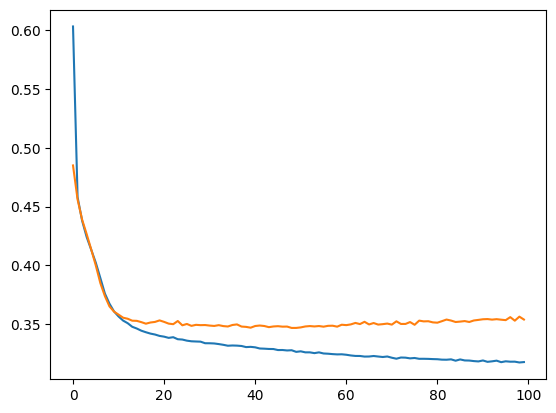

In [63]:
#Training loss
plt.plot(history.history['loss'])
#Validation loss
plt.plot(history.history['val_loss'])


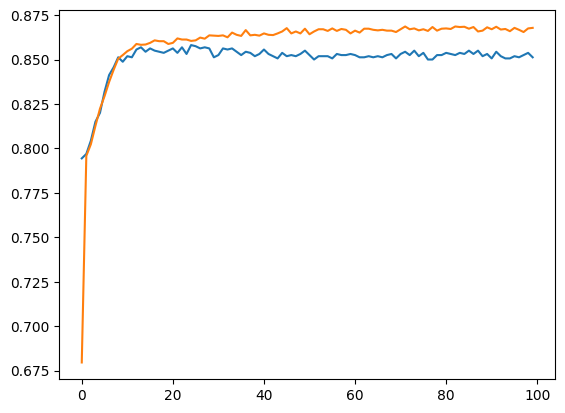

In [67]:
#Accuracy
plt.plot(history.history['val_binary_accuracy'])
#Val_ac curaxy
plt.plot(history.history['binary_accuracy'])